In [5]:
import pandas as pd

# Load the dataset
data = pd.read_csv('USA Housing Dataset.csv')

# Inspect the first few rows
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


In [6]:
# Summary statistics for numerical columns
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.140000e+03,4140.000000,4140.000000,4140.000000,4.140000e+03,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000
mean,5.530629e+05,3.400483,2.163043,2143.638889,1.469764e+04,1.514130,0.007488,0.246618,3.452415,1831.351449,312.287440,1970.814010,808.368357
std,5.836865e+05,0.903939,0.784733,957.481621,3.587684e+04,0.534941,0.086219,0.790619,0.678533,861.382947,464.349222,29.807941,979.380535
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.200000e+05,3.000000,1.750000,1470.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.600000e+05,3.000000,2.250000,1980.000000,7.676000e+03,1.500000,0.000000,0.000000,3.000000,1600.000000,0.000000,1976.000000,0.000000
75%,6.591250e+05,4.000000,2.500000,2620.000000,1.100000e+04,2.000000,0.000000,0.000000,4.000000,2310.000000,602.500000,1997.000000,1999.000000
max,2.659000e+07,8.000000,6.750000,10040.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,8020.000000,4820.000000,2014.000000,2014.000000


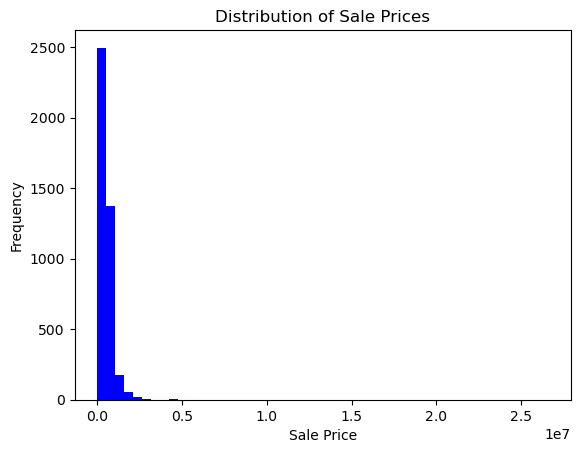

In [10]:
import matplotlib.pyplot as plt
plt.hist(data['price'], bins=50, color='blue')
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')


plt.show()

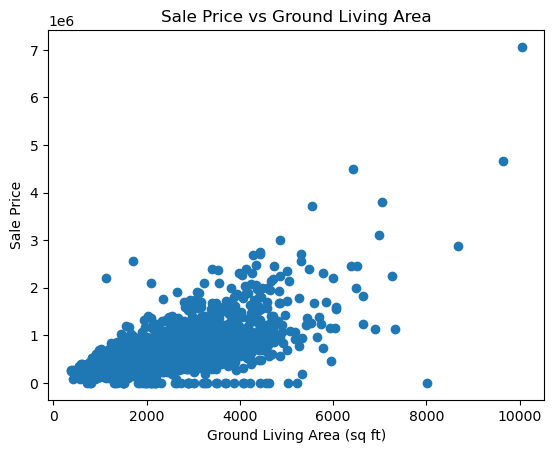

In [26]:
plt.scatter(data['sqft_living'], data['price'])
plt.title('Sale Price vs Ground Living Area')
plt.xlabel('Ground Living Area (sq ft)')
plt.ylabel('Sale Price')
plt.show()

C:\Users\jcity\AppData\Local\Temp\ipykernel_99304\1265536043.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


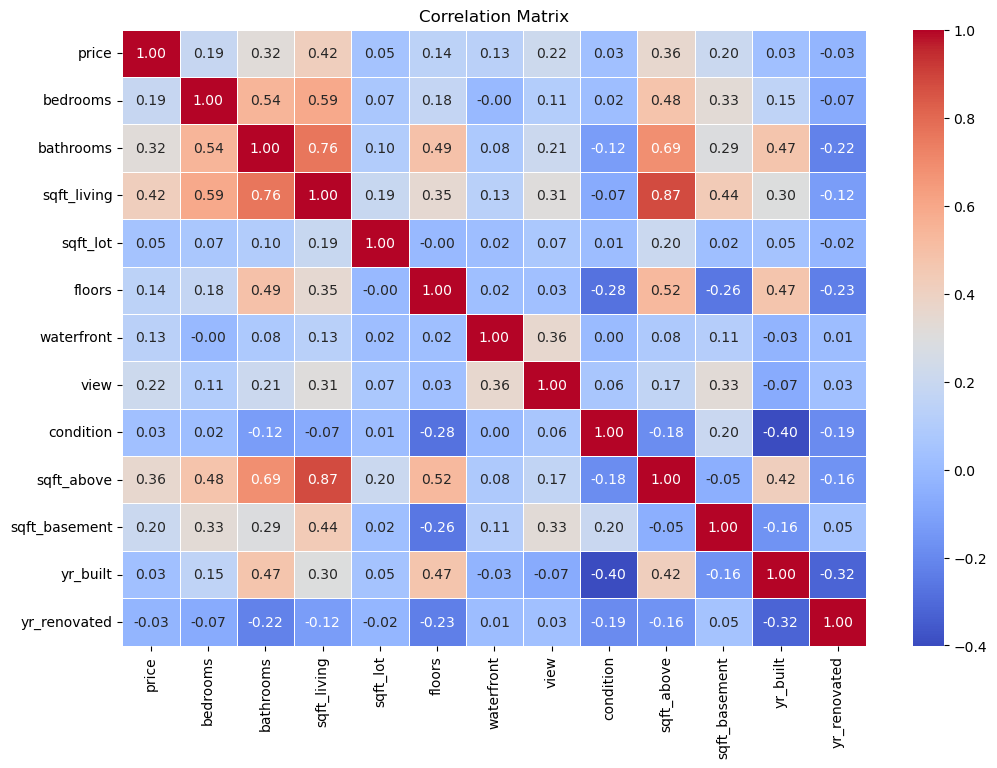

In [14]:
corr_matrix = data.corr()
import seaborn as sns
# Increase the figure size for better readability
plt.figure(figsize=(12, 8))

# Plot the heatmap with rounded annotations and adjust the color map
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Matrix')
plt.show()

In [15]:
missing_data = data.isnull().sum().sort_values(ascending=False)
missing_data[missing_data > 0]

Series([], dtype: int64)

In [16]:
missing_data


date             0
price            0
statezip         0
city             0
street           0
yr_renovated     0
yr_built         0
sqft_basement    0
sqft_above       0
condition        0
view             0
waterfront       0
floors           0
sqft_lot         0
sqft_living      0
bathrooms        0
bedrooms         0
country          0
dtype: int64

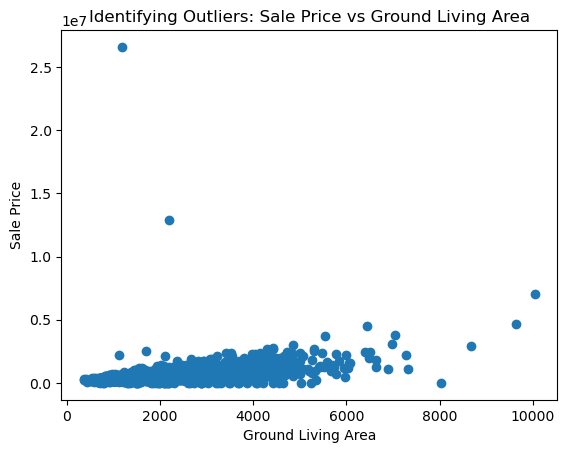

In [17]:
plt.scatter(data['sqft_living'], data['price'])
plt.title('Identifying Outliers: Sale Price vs Ground Living Area')
plt.xlabel('Ground Living Area')
plt.ylabel('Sale Price')
plt.show()

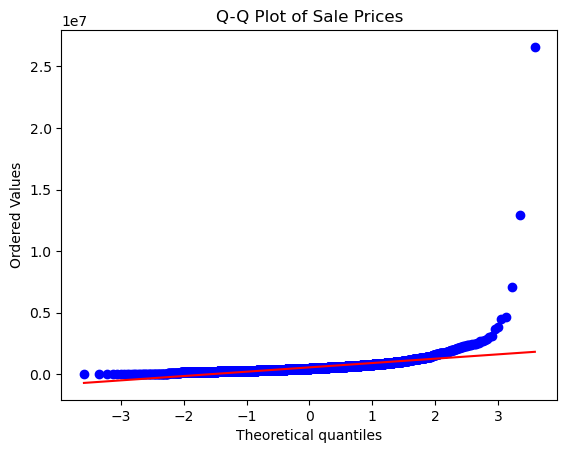

In [19]:
import scipy.stats as stats

# Q-Q plot for SalePrice
stats.probplot(data['price'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Sale Prices')
lt.show()

In [21]:
data[data['price'] > 10000000]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
3886,2014-06-23 00:00:00,12899000.0,3.0,2.5,2190,11394,1.0,0,0,3,1550,640,1956,2001,5426 40th Ave W,Seattle,WA 98199,USA
3890,2014-07-03 00:00:00,26590000.0,3.0,2.0,1180,7793,1.0,0,0,4,1180,0,1992,0,12005 SE 219th Ct,Kent,WA 98031,USA


In [23]:
# remove the outliers
data = data[data['price'] < 10000000]

# check they are removed
data[data['price'] > 10000000]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country


In [27]:
data[data['price'] > 10000000]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country


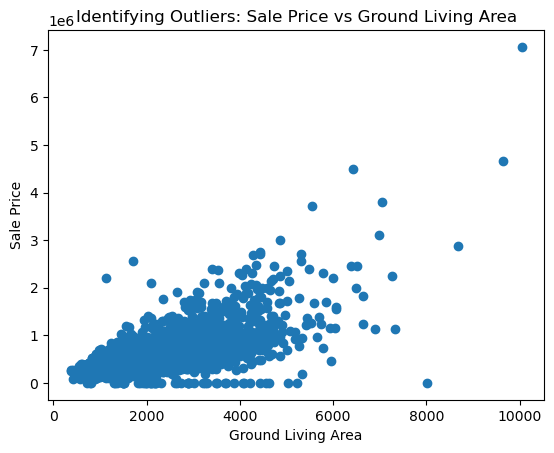

In [24]:
plt.scatter(data['sqft_living'], data['price'])
plt.title('Identifying Outliers: Sale Price vs Ground Living Area')
plt.xlabel('Ground Living Area')
plt.ylabel('Sale Price')
plt.show()

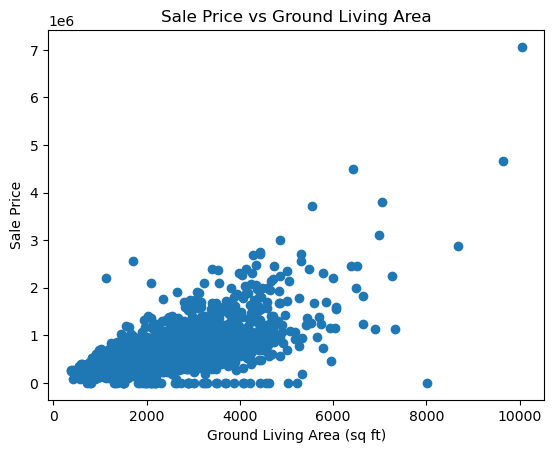

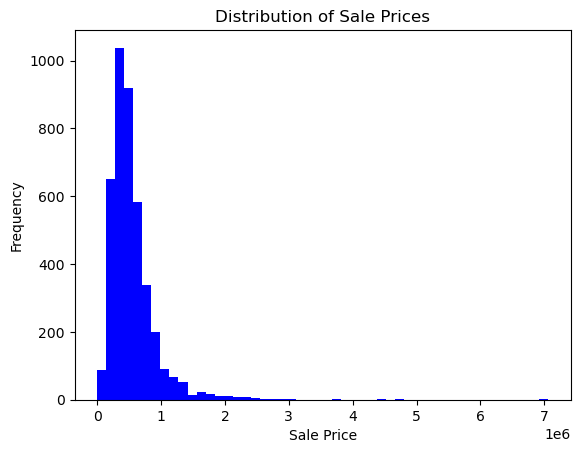

In [29]:
plt.hist(data['price'], bins=50, color='blue')
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')


plt.show()

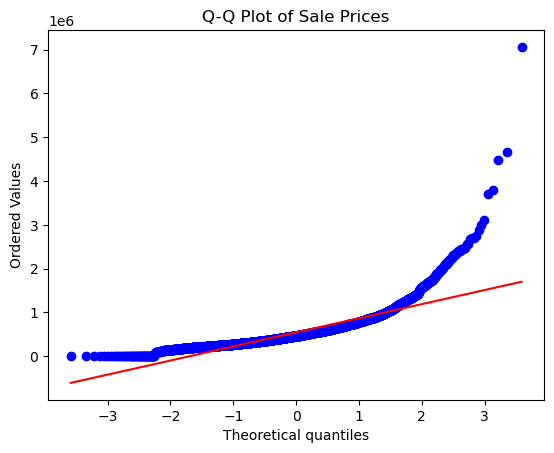

In [31]:
import scipy.stats as stats

# Q-Q plot for SalePrice
stats.probplot(data['price'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Sale Prices')
plt.show()